121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3444 - loss: 1.8128    
Test Loss: 1.7957
Test Accuracy: 0.3460
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step    


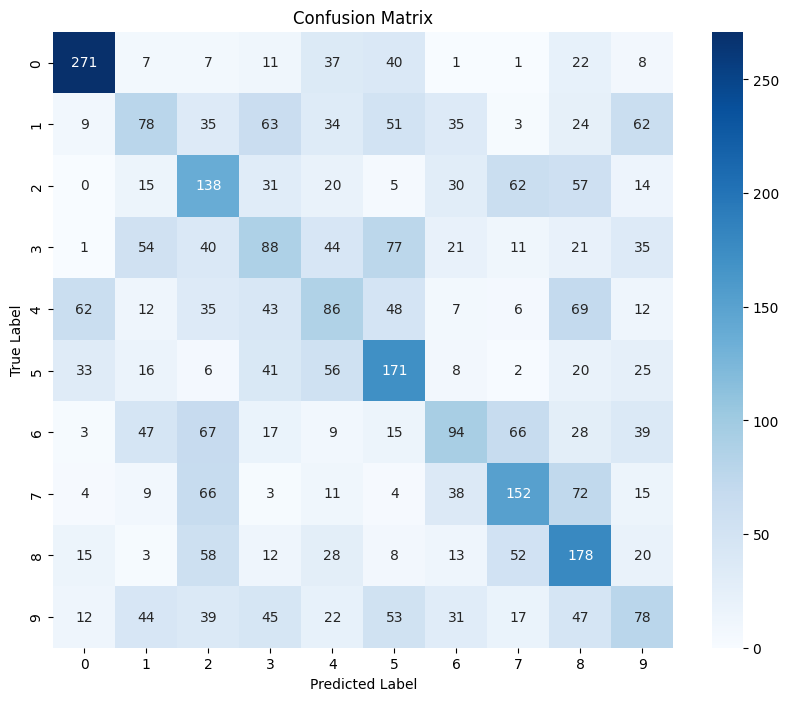

Classification Report:
               precision    recall  f1-score   support

           0     0.6610    0.6691    0.6650       405
           1     0.2737    0.1980    0.2297       394
           2     0.2811    0.3710    0.3198       372
           3     0.2486    0.2245    0.2359       392
           4     0.2478    0.2263    0.2366       380
           5     0.3623    0.4524    0.4024       378
           6     0.3381    0.2442    0.2836       385
           7     0.4086    0.4064    0.4075       374
           8     0.3309    0.4599    0.3849       387
           9     0.2532    0.2010    0.2241       388

    accuracy                         0.3460      3855
   macro avg     0.3405    0.3453    0.3390      3855
weighted avg     0.3419    0.3460    0.3400      3855



In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# データ保存先
DATA_DIR = "./data/"

# テストデータのロード
X_test = np.load(os.path.join(DATA_DIR, "X_test.npy"))
y_test = np.load(os.path.join(DATA_DIR, "y_test.npy"))

# LSTM に適したデータ形状に変換（[サンプル数, 時系列長, 特徴量数]）
sequence_length = X_test.shape[1]
X_test = X_test.reshape((X_test.shape[0], sequence_length, 1))

# モデルのロード
model_path = os.path.join(DATA_DIR, "cnn_lstm_model.keras")
if not os.path.exists(model_path):
    raise FileNotFoundError(f"モデルファイル {model_path} が見つかりません。")

model = tf.keras.models.load_model(model_path)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 予測を実行
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix の可視化
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report の出力（Precision, Recall, F1-score）
report = classification_report(y_true_classes, y_pred_classes, digits=4)
print("Classification Report:\n", report)